In [1]:
import pyuvdata
import numpy as np
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/beam_manipulation")
import jones_to_mueller
import importlib
importlib.reload(jones_to_mueller)
import matplotlib
import matplotlib.pyplot as plt

In [2]:
beam_path = "/Users/ruby/Astro/Nivedita_beams/LWA_10to100.beamfits"
beam = pyuvdata.UVBeam()
beam.read(beam_path)
beam.select(axis2_inds=np.where(beam.axis2_array <= np.pi/2)[0])
beam.peak_normalize()

In [3]:
# Beam manipulations
beam_radec = jones_to_mueller.pol_basis_transform_azza_to_radec(beam, latitude=37.23, inplace=False)
mueller_coherency = jones_to_mueller.convert_jones_to_mueller(beam_radec)
mueller_stokes = jones_to_mueller.pol_basis_transform_radec_to_stokes(mueller_coherency, inplace=False)
mueller_pstokes = jones_to_mueller.pol_basis_transform_instrumental_to_pseudostokes(mueller_stokes)

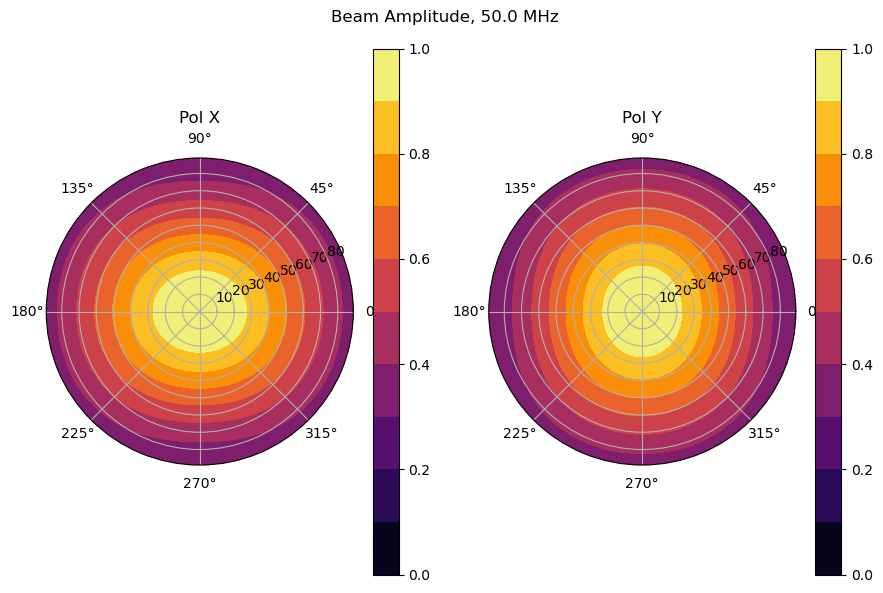

In [4]:
jones_to_mueller.plot_beam(beam, contour_plot=True, plot_amplitude=True, plot_freq=50e6, vmin=0, vmax=1)

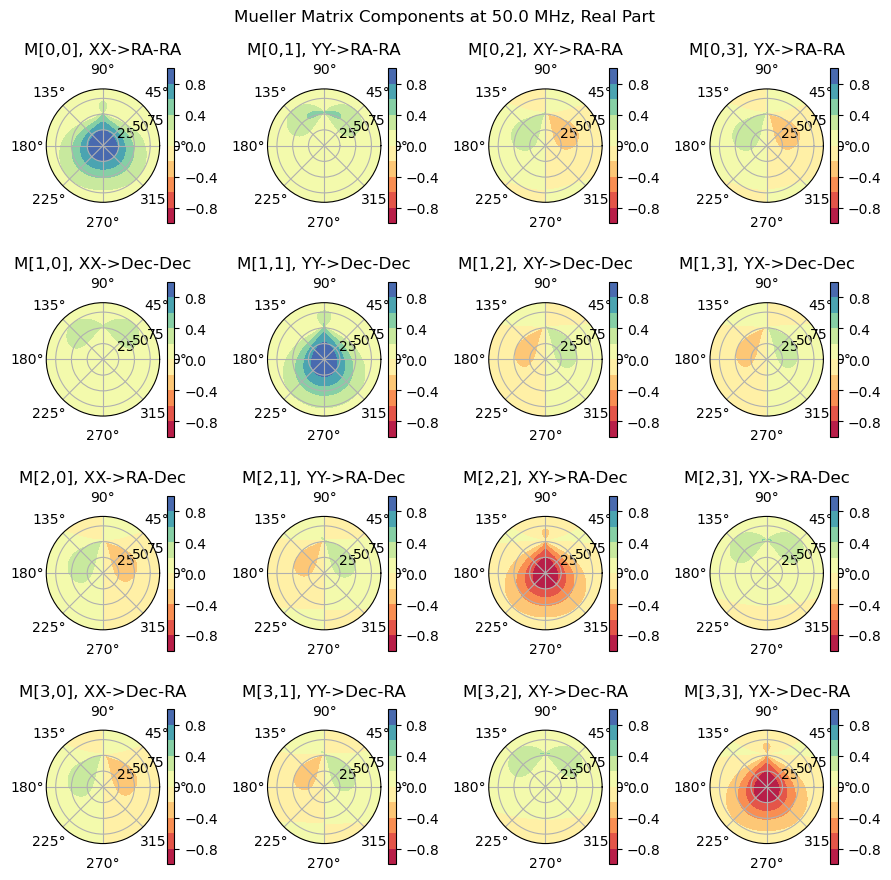

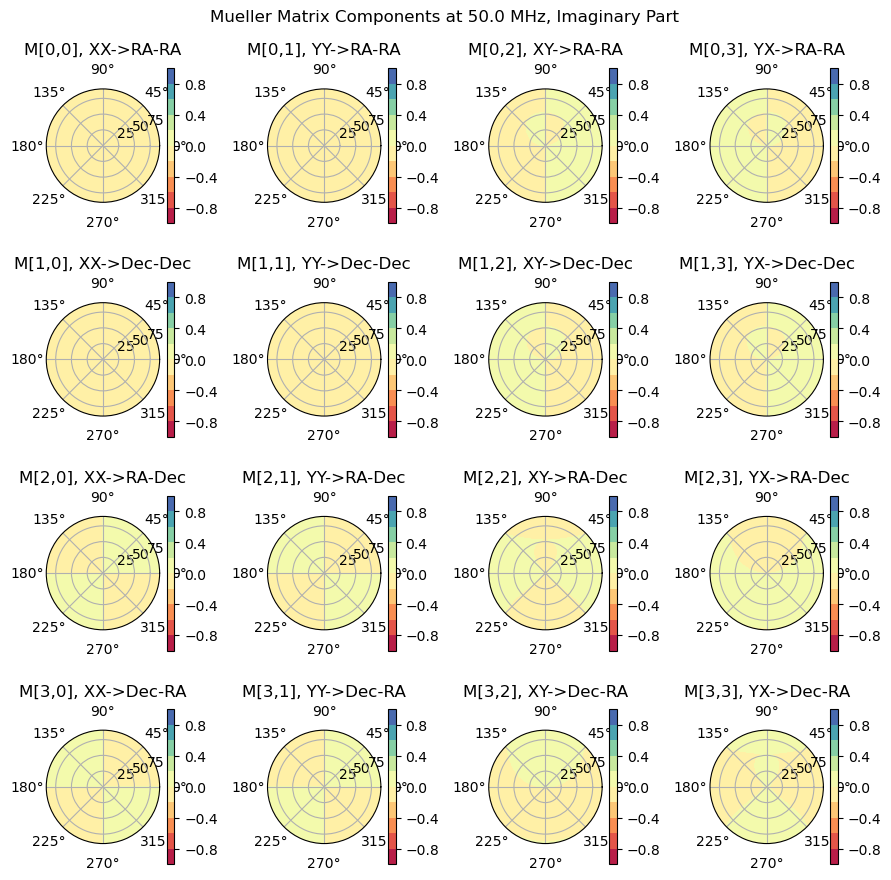

In [5]:
jones_to_mueller.plot_mueller_matrix(
    mueller_coherency,
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=50.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=False,
)
jones_to_mueller.plot_mueller_matrix(
    mueller_coherency,
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=50.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=False,
    contour_plot=True,
    stokes=False,
)

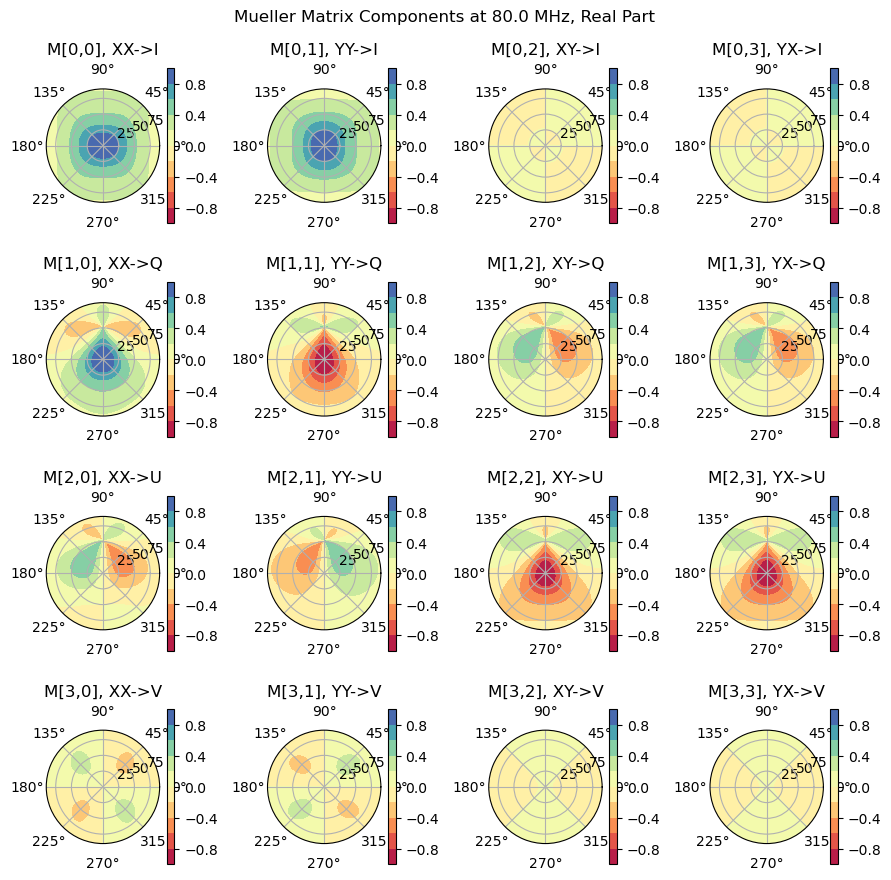

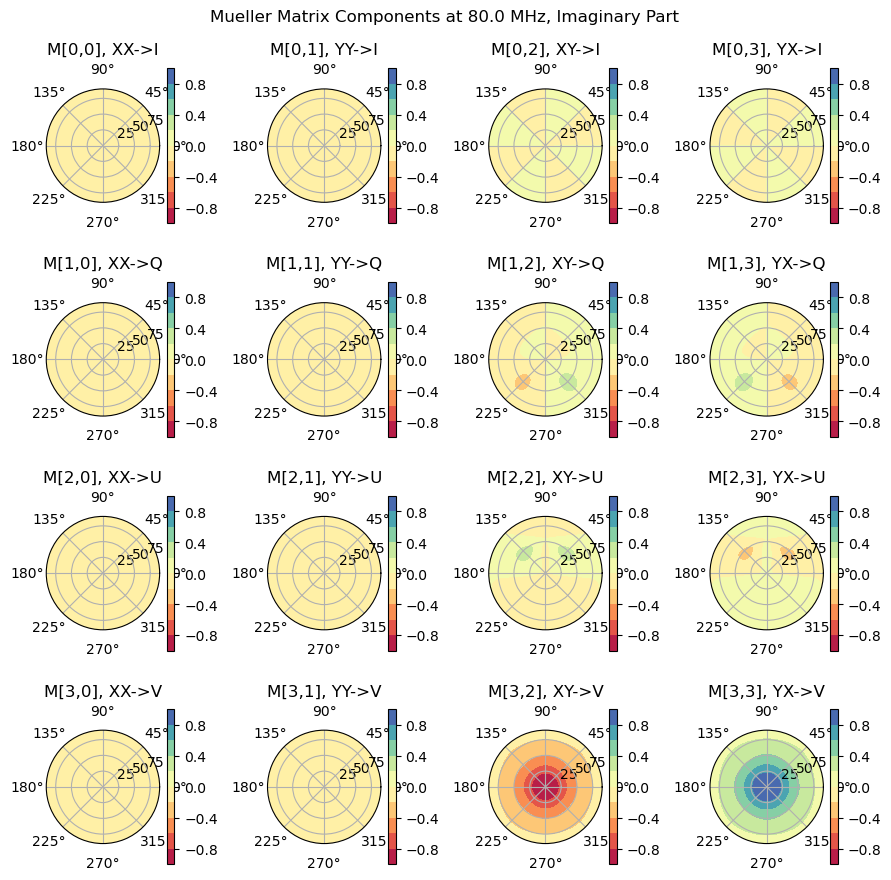

In [6]:
jones_to_mueller.plot_mueller_matrix(
    mueller_stokes,  # pyuvdata beam object
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=80.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=True,
)
jones_to_mueller.plot_mueller_matrix(
    mueller_stokes,  # pyuvdata beam object
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=80.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=False,
    contour_plot=True,
    stokes=True,
)

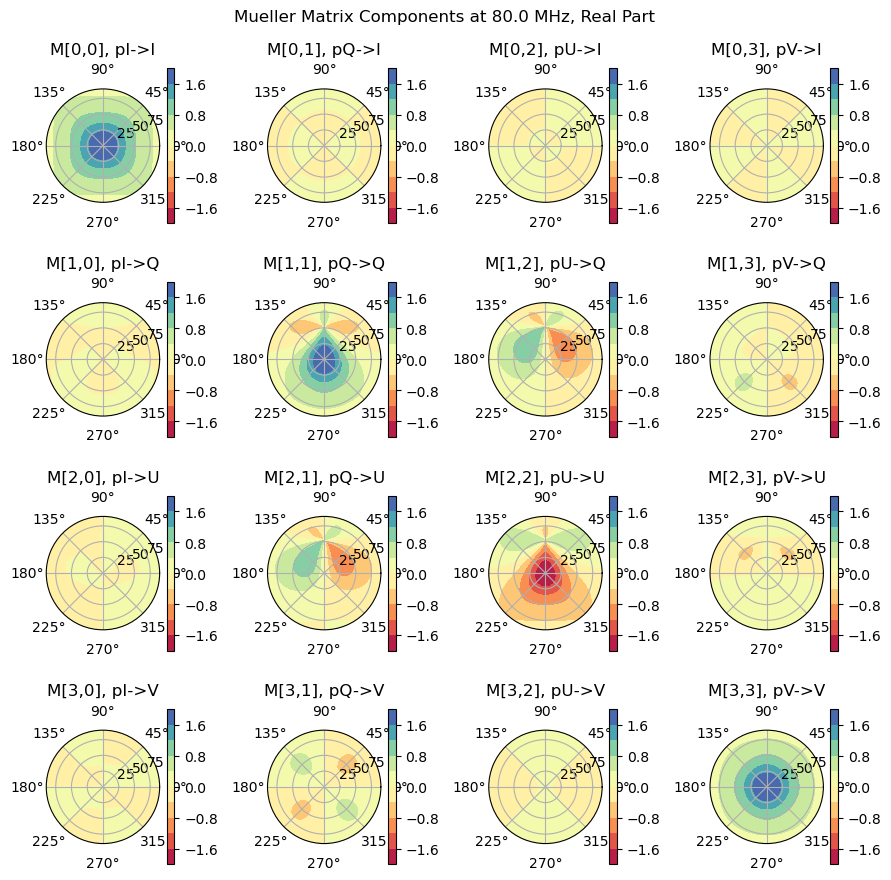

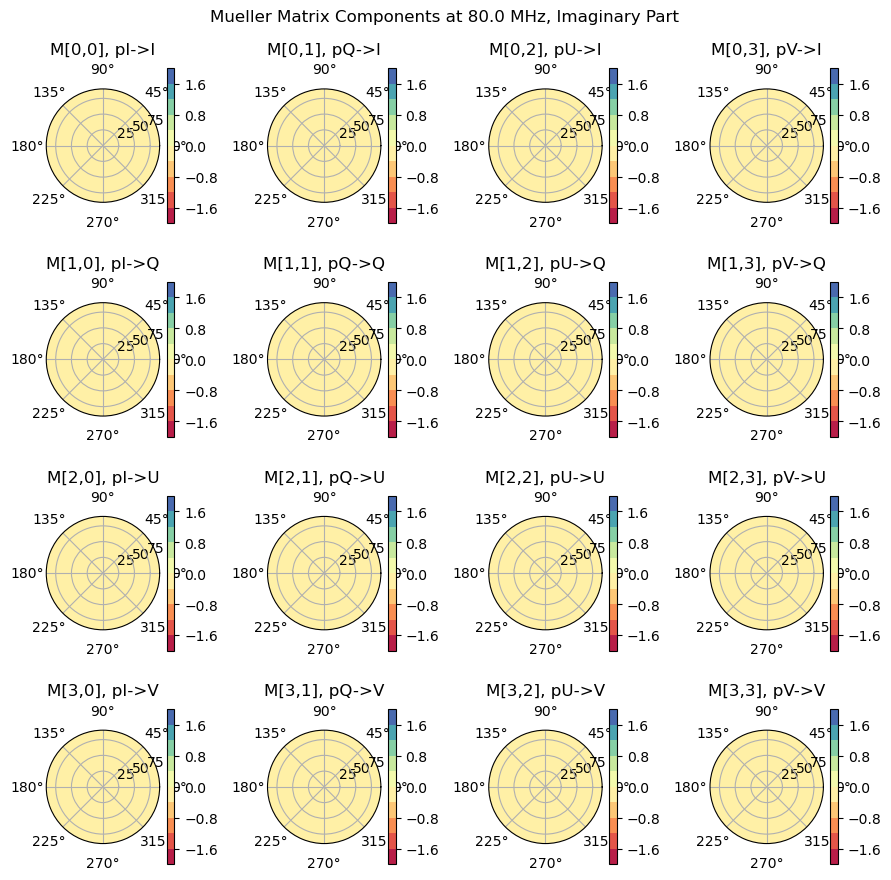

In [7]:
jones_to_mueller.plot_mueller_matrix(
    mueller_pstokes,  # pyuvdata beam object
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=80.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=True,
    contour_plot=True,
    stokes=True,
    pseudostokes=True,
    vmin=-2,
    vmax=2,
)
jones_to_mueller.plot_mueller_matrix(
    mueller_pstokes,  # pyuvdata beam object
    np.degrees(beam_radec.axis1_array),
    np.degrees(beam_radec.axis2_array),
    beam_radec.freq_array,
    plot_freq=80.0e6,  # frequency in Hz, must be included in the beam obj
    real_part=False,
    contour_plot=True,
    stokes=True,
    pseudostokes=True,
    vmin=-2,
    vmax=2,
)

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


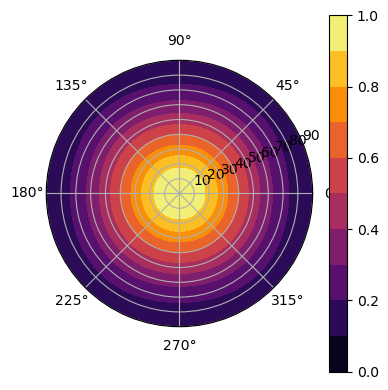

In [30]:
use_cmap = matplotlib.cm.get_cmap("Spectral").copy()
use_cmap.set_bad(color="whitesmoke")
za_vals, az_vals = np.meshgrid(np.degrees(beam_radec.axis2_array), np.degrees(beam_radec.axis1_array))
freq_ind = np.where(beam_radec.freq_array.flatten() == 50e6)[0][0]
fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw=dict(projection="polar"), figsize=(4, 4)
)
contourplot = jones_to_mueller.make_polar_contour_plot(
    ax,
    (mueller_pstokes[0, 0, 0, freq_ind, :, :]).T/2,
    np.radians(az_vals),
    za_vals,
    vmin=0,
    vmax=1,
)
fig.colorbar(contourplot, ax=ax)
fig.tight_layout()
plt.show()

In [9]:
cos_mueller = np.copy(mueller_pstokes[0, 0, 0, freq_ind, :, :])
cos_mueller[:,:] = (np.cos(beam_radec.axis2_array)**1.6)[:, np.newaxis]

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


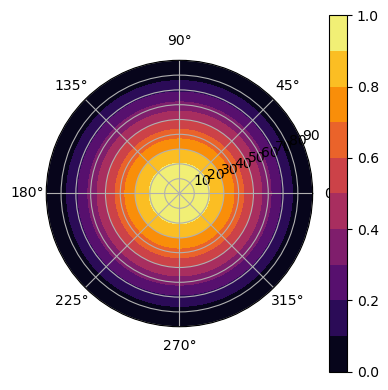

In [10]:
za_vals, az_vals = np.meshgrid(np.degrees(beam_radec.axis2_array), np.degrees(beam_radec.axis1_array))
freq_ind = np.where(beam_radec.freq_array.flatten() == 50e6)[0][0]
fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw=dict(projection="polar"), figsize=(4, 4)
)
contourplot = jones_to_mueller.make_polar_contour_plot(
    ax,
    (cos_mueller).T,
    np.radians(az_vals),
    za_vals,
    vmin=0,
    vmax=1,
)
fig.colorbar(contourplot, ax=ax)
fig.tight_layout()
plt.show()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


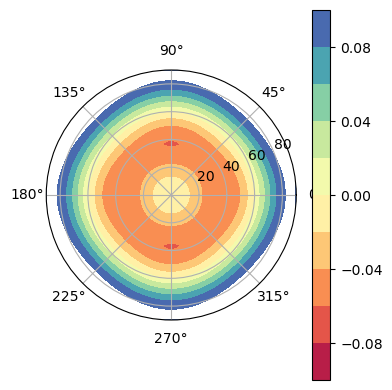

In [18]:
za_vals, az_vals = np.meshgrid(np.degrees(beam_radec.axis2_array), np.degrees(beam_radec.axis1_array))
freq_ind = np.where(beam_radec.freq_array.flatten() == 50e6)[0][0]
fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw=dict(projection="polar"), figsize=(4, 4)
)
contourplot = jones_to_mueller.make_polar_contour_plot(
    ax,
    (mueller_pstokes[0, 0, 0, freq_ind, :, :]).T/2 - (cos_mueller).T,
    np.radians(az_vals),
    za_vals,
    vmin=-.1,
    vmax=.1,
)
fig.colorbar(contourplot, ax=ax)
fig.tight_layout()
plt.show()

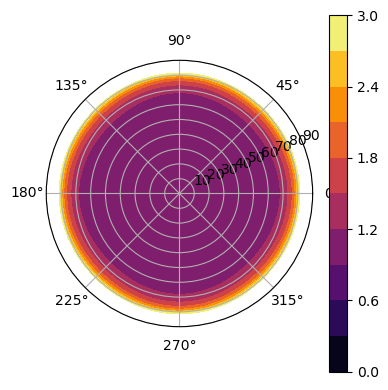

In [28]:
za_vals, az_vals = np.meshgrid(np.degrees(beam_radec.axis2_array), np.degrees(beam_radec.axis1_array))
freq_ind = np.where(beam_radec.freq_array.flatten() == 50e6)[0][0]
fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw=dict(projection="polar"), figsize=(4, 4)
)
contourplot = jones_to_mueller.make_polar_contour_plot(
    ax,
    np.abs((mueller_pstokes[0, 0, 0, freq_ind, :, :]).T)/2 / np.abs((cos_mueller).T),
    np.radians(az_vals),
    za_vals,
    vmin=0,
    vmax=3
)
fig.colorbar(contourplot, ax=ax)
fig.tight_layout()
plt.show()